In [95]:
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB


In [3]:
titanic=pd.read_csv('train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Pre-Processing

In [7]:
#Dealing with missing data
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

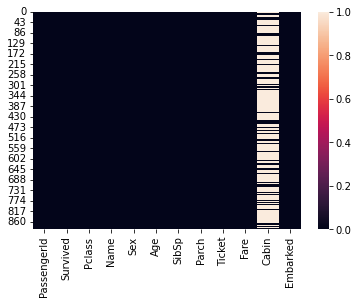

In [9]:
# Representation of missing data
sns.heatmap(titanic.isna())

In [10]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

<AxesSubplot:>

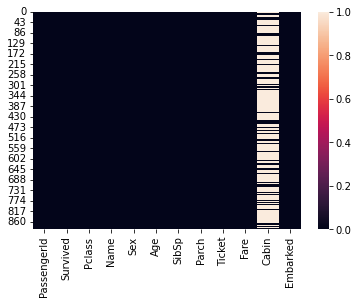

In [11]:
sns.heatmap(titanic.isna())

In [12]:
# no use Cabin feature is not important
titanic.drop('Cabin',axis=1, inplace=True)

In [13]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [15]:
# how many numbers every element in sex
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
sex =pd.get_dummies(titanic['Sex'])
sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [18]:
sex =pd.get_dummies(titanic['Sex'],drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [19]:
# embark convert 0, 1 by get_dummies
emb = pd.get_dummies(titanic['Embarked'])
emb

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [20]:
# put new sex, embarked colums
titanic = pd.concat([titanic,sex,emb],axis=1)
titanic

In [ ]:
titanic.drop(['PassengerId','Name','Sex','Ticket','Embarked'],axis=1, inplace=True)
titanic

In [24]:
titanic.rename(columns={'male':'Gender'},inplace=True)
titanic

In [ ]:
 # Exploratory Data Analysis  (EDA)

<AxesSubplot:xlabel='Survived', ylabel='count'>

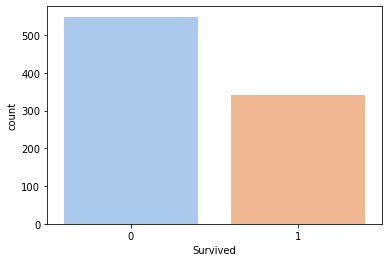

In [26]:
sns.countplot(x='Survived',data=titanic,palette='pastel')

<AxesSubplot:xlabel='Survived', ylabel='count'>

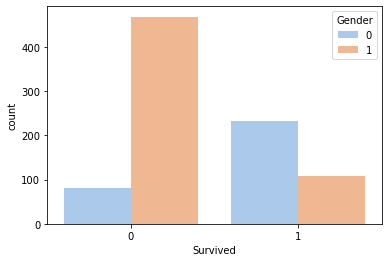

In [27]:
sns.countplot(x='Survived',data=titanic,hue='Gender',palette='pastel')

<AxesSubplot:>

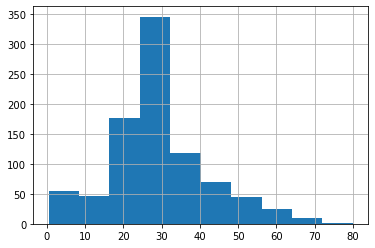

In [103]:
titanic['Age'].hist()

In [28]:
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,C,Q,S
0,0,3,22.000000,1,0,7.2500,1,0,0,1
1,1,1,38.000000,1,0,71.2833,0,1,0,0
2,1,3,26.000000,0,0,7.9250,0,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,0,1
887,1,1,19.000000,0,0,30.0000,0,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,0,1
889,1,1,26.000000,0,0,30.0000,1,1,0,0


In [29]:
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']
X

In [ ]:
# mutual_information

In [106]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(titanic.drop(labels=['Survived'], axis=1),
    titanic['Survived'],
    test_size=0.3,
    random_state=0)
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.11783851, 0.00897355, 0.01652911, 0.00936091, 0.10137519,
       0.13000883, 0.02418994, 0.00192067, 0.        ])

In [107]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Gender    0.130009
Pclass    0.117839
Fare      0.101375
C         0.024190
SibSp     0.016529
Parch     0.009361
Age       0.008974
Q         0.001921
S         0.000000
dtype: float64

In [ ]:
#Dimensionality Reduction (PCA)

In [59]:
# In standardisation, all features will be transformed to have the properties of standard normal 
# distribution with mean=0 and standard deviation=1
# 
# columns argument ==> we'll use this later to create a new dataframe with the rescaled data 

columns = X.columns

# the scaler to use will be 
scaler = StandardScaler()

# 'scaler' is for the rescaling technique, 'fit' function is to find the x_min and the x_max, 'transform' function applies formula to all elements of data
rescaled_dataset_standard = scaler.fit_transform(X
rescaled_dataset_standard

array([[ 0.82737724, -0.5924806 ,  0.43279337, ..., -0.48204268,
        -0.30756234,  0.61930636],
       [-1.56610693,  0.63878901,  0.43279337, ...,  2.0745051 ,
        -0.30756234, -1.61470971],
       [ 0.82737724, -0.2846632 , -0.4745452 , ..., -0.48204268,
        -0.30756234,  0.61930636],
       ...,
       [ 0.82737724,  0.        ,  0.43279337, ..., -0.48204268,
        -0.30756234,  0.61930636],
       [-1.56610693, -0.2846632 , -0.4745452 , ...,  2.0745051 ,
        -0.30756234, -1.61470971],
       [ 0.82737724,  0.17706291, -0.4745452 , ..., -0.48204268,
         3.25137334, -1.61470971]])

In [60]:
# standardisation
# we need to create a new dataframe with the column lables and the rescaled values 
df_standard = pd.DataFrame(data= rescaled_dataset_standard , columns = columns)
df_standard

,Pclass,Age,SibSp,Parch,Fare,Gender,C,Q,S
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445,0.737695,-0.482043,-0.307562,0.619306
1,-1.566107,0.638789,0.432793,-0.473674,0.786845,-1.355574,2.074505,-0.307562,-1.614710
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,-1.355574,-0.482043,-0.307562,0.619306
3,-1.566107,0.407926,0.432793,-0.473674,0.420730,-1.355574,-0.482043,-0.307562,0.619306
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337,0.737695,-0.482043,-0.307562,0.619306
...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671,0.737695,-0.482043,-0.307562,0.619306
887,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381,-1.355574,-0.482043,-0.307562,0.619306
888,0.827377,0.000000,0.432793,2.008933,-0.176263,-1.355574,-0.482043,-0.307562,0.619306
889,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381,0.737695,2.074505,-0.307562,-1.614710


In [62]:
# fit and transform
pca = PCA()
pca_data_standard = pca.fit_transform(df_standard)
#print(pca_data_standard)

# percentage variation
print("pca variance ratio: ", pca.explained_variance_ratio_) 
per_var = np.round(pca.explained_variance_ratio_*100, decimals =1)
print("Rounded percentage: ", per_var)

#labels = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']
labels = ['PC' + str(x) for x in range (1, len(per_var)+1)]
print("Labels are: ", labels)

pca variance ratio:  [0.24010463 0.19709038 0.18098052 0.1136053  0.09224644 0.07460711
 0.06108142 0.03971636 0.00056784]
Rounded percentage:  [24.  19.7 18.1 11.4  9.2  7.5  6.1  4.   0.1]
Labels are:  ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']


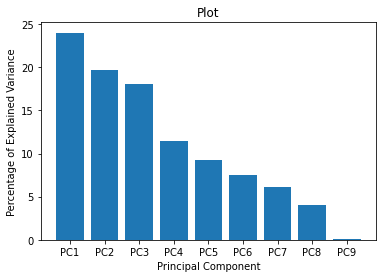

Distribution of the original data =  82.4


In [63]:
# plot the percentage of explained variance by principal component
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Plot')
plt.show()

print("Distribution of the original data = ", per_var[0]+per_var[1]+per_var[2]+per_var[3]+per_var[4])

In [64]:
# dataframe with PC1, PC2, P3, PC4
pca_df_standard = pd.DataFrame(pca_data_standard, columns= labels)
data_after_PCA = pca_df_standard.drop(['PC6','PC7','PC8','PC9'], axis = 1)
data_after_PCA

,PC1,PC2,PC3,PC4,PC5
0,-1.442940,-0.008221,0.100892,-0.707328,0.294190
1,3.296693,-0.078769,-0.011190,-0.144414,-0.571694
2,-0.926939,0.041288,0.144934,0.382312,-1.582286
3,0.606504,0.846870,-1.174673,1.150493,-0.725740
4,-1.254432,-0.717899,-0.539017,-0.258649,0.160104
...,...,...,...,...,...
886,-0.797124,-0.418231,-0.838570,-0.284058,0.020158
887,0.211879,0.543600,-0.790312,0.640356,-1.609881
888,-0.616531,1.922507,0.653799,0.606203,-0.705672
889,2.345125,-1.157941,-0.079721,-1.494522,0.099020


In [ ]:
# K-means Clustering

In [72]:
km = KMeans (
    n_clusters = 2, # number of clusters/centroids to create
    init = 'random', # ‘random’: choose n_clusters observations (rows) at random from data for the initial centroids
    max_iter = 300, # this is the default value. This is the maximum number of iterations of the k-means algorithm for a single run.
    random_state = 0 # this is the default value. Determines random number generation for centroid initialization. Use an int to make the randomness deterministic.
)

In [73]:
# data2 is the original dataset with standard scaling and 4 principal components found with PCA
# method to compute the clusters and assign the labels
y_predicted_data2 = km.fit_predict(data_after_PCA) # fit_predict --> Compute cluster centers and predict cluster index for each sample.
y_predicted_data2

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,

In [74]:
# add the cluster column to the dataframe (dataset does not include feature 'country')
X['cluster'] = y_predicted_data2
X.head()

,Pclass,Age,SibSp,Parch,Fare,Gender,C,Q,S,cluster
0,3,22.0,1,0,7.2500,1,0,0,1,1
1,1,38.0,1,0,71.2833,0,1,0,0,0
2,3,26.0,0,0,7.9250,0,0,0,1,1
3,1,35.0,1,0,53.1000,0,0,0,1,1
4,3,35.0,0,0,8.0500,1,0,0,1,1


In [34]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=5)

In [ ]:
# Classification

In [36]:
model = LogisticRegression(max_iter = 5000)

In [37]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [40]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [42]:
y_test.values

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [ ]:
# Model Evaluation

In [55]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred) * 100)
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy Score:  81.56424581005587
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.89      0.86       111
           1       0.80      0.69      0.74        68

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179



In [ ]:
# grid srearch

In [91]:
iris = load_iris()

X = iris.data
y = iris.target
class_names = iris.target_names
class_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [80]:
grid_space = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [0.1, 0.01, 0.001, 0.0001]}

svc = svm.SVC(kernel='linear')

In [92]:
grid = GridSearchCV(
    estimator=svc,
    param_grid=grid_space,
    cv=5, 
    scoring='accuracy')

In [86]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109)
grid.fit(X_train,y_train)

#print the best parameters from all possible combinations
print("best parameters are: ", grid.best_params_)

best parameters are:  {'C': 1, 'gamma': 0.1}


In [87]:
# y_pred = grid.predict(X_test)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 95.55555555555556


In [88]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      0.88      0.94        17
   virginica       0.89      1.00      0.94        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

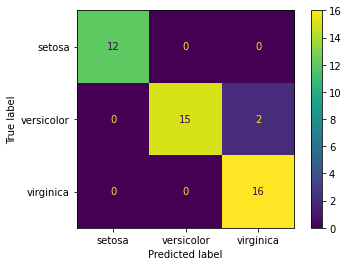

In [85]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = class_names)

cm_display.plot()
plt.show()

In [ ]:
# Pipline And ensemble

In [98]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [99]:
pipeline_lr = Pipeline([('classifier_LR', LogisticRegression())])
pipeline_dt = Pipeline([('classifier_DT', DecisionTreeClassifier())])
pipeline_svm = Pipeline([('classifier_svm', SVC())])

In [100]:
ensemble_classifier = VotingClassifier(
    estimators=[('lr', pipeline_lr), ('dt', pipeline_dt), ('svm', pipeline_svm)],
    voting='hard')  # 'hard' for majority voting, 'soft' for weighted voting based on confidence

In [101]:
ensemble_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              Pipeline(steps=[('classifier_LR',
                                               LogisticRegression())])),
                             ('dt',
                              Pipeline(steps=[('classifier_DT',
                                               DecisionTreeClassifier())])),
                             ('svm',
                              Pipeline(steps=[('classifier_svm', SVC())]))])

In [102]:
accuracy = ensemble_classifier.score(X_test, y_test)
print(f'Ensemble Classifier Accuracy: {accuracy}')

Ensemble Classifier Accuracy: 0.9111111111111111
